#Smarthphone Classification

##Importar CSV

In [1]:
import pandas as pd
df = pd.read_csv("Smarthphone.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


##Data de Entrenamiento y Test

In [0]:
X = df.drop(['price_range'], axis=1)
y = df['price_range']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print('Train shape: ',X_train.shape)
print('Validation shape: ',X_test.shape)

Train shape:  (1600, 20)
Validation shape:  (400, 20)


##Árbol de Clasficación

In [14]:
from sklearn.tree import DecisionTreeClassifier
clasificador = DecisionTreeClassifier(max_depth=13)
clasificador.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=13, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
clasificador.score(X_test,y_test)

0.965

MATRIZ DE CINFUCUIN

In [18]:
y_pred = clasificador.predict(X_test)
df_confusion_arbol = pd.crosstab(y_test, y_pred,rownames=['Original'], colnames=['Predicted'])
df_confusion_arbol

Predicted,0,1,2,3
Original,,,,
0,96,2,0,0
1,2,88,1,0
2,0,5,97,2
3,0,0,2,105


In [19]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        98
           1       0.93      0.97      0.95        91
           2       0.97      0.93      0.95       104
           3       0.98      0.98      0.98       107

    accuracy                           0.96       400
   macro avg       0.96      0.97      0.96       400
weighted avg       0.97      0.96      0.97       400



cuesta mas clasificar un telefono caro que barato

prediction
*   0 90/97 =0.98
*   2 78/(9+78+10)=0.97



In [0]:
max_depth_range = list(range(2, 15)) #Reemplazar el max valor (15) con la máxima profundidad por defecto para su arbol +1
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)    
    score = clf.score(X_test, y_test)
    
    accuracy.append(score)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

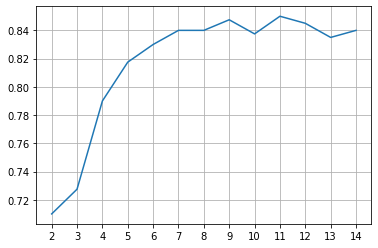

In [0]:
plt.plot(accuracy)
plt.xticks(list(range(len(max_depth_range))),max_depth_range)
plt.grid()
plt.show()

##Matriz de confusión

In [22]:
from sklearn.model_selection import KFold
from sklearn import metrics
NSplits = 10
kf = KFold(n_splits=NSplits)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)


arbol de descicion

In [26]:
AccTotal = 0
for train_index, test_index in kf.split(X):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  arbol3 = DecisionTreeClassifier(max_depth=5)
  arbol3.fit(X_train,y_train)

  y_pred = arbol3.predict(X_test)
  AccFolder = metrics.accuracy_score(y_test, y_pred)*100
  print("Accuracy Folder", AccFolder)
  
  AccTotal += AccFolder
  
print("Accuracy General:", AccTotal/NSplits)

Accuracy Folder 82.5
Accuracy Folder 82.0
Accuracy Folder 85.0
Accuracy Folder 84.0
Accuracy Folder 82.5
Accuracy Folder 80.5
Accuracy Folder 84.0
Accuracy Folder 82.5
Accuracy Folder 81.0
Accuracy Folder 79.5
Accuracy General: 82.35


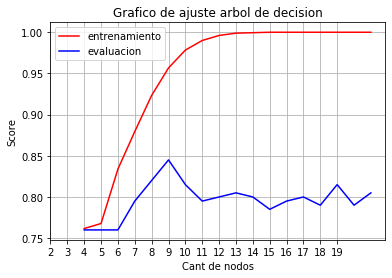

In [27]:
# Grafico de ajuste del árbol de decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(2, 20))

for deep in max_deep_list:
    arbol3 = DecisionTreeClassifier(max_depth=deep)
    arbol3.fit(X_train,y_train)
    train_prec.append(arbol3.score(X_train, y_train))
    eval_prec.append(arbol3.score(X_test, y_test))

# graficar los resultados.
plt.plot(max_deep_list, train_prec, color='r', label='entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='evaluacion')
plt.title('Grafico de ajuste arbol de decision')
plt.legend()
plt.grid()
plt.xticks(list(range(len(max_deep_list))),max_deep_list)
plt.ylabel('Score')
plt.xlabel('Cant de nodos')
plt.show()

knn

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [32]:
from sklearn.model_selection import KFold
from sklearn import metrics
NSplits = 10
kf = KFold(n_splits=NSplits)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)


In [33]:
AccTotal = 0
for train_index, test_index in kf.split(X):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  classifier3 = KNeighborsClassifier(n_neighbors=7,weights='distance',metric='cosine')
  classifier3.fit(X_train, y_train)

  y_pred = classifier3.predict(X_test)
  AccFolder = metrics.accuracy_score(y_test, y_pred)*100
  print("Accuracy Folder", AccFolder)
  
  AccTotal += AccFolder
  
print("Accuracy General:", AccTotal/NSplits)

NameError: ignored

##Cross Validation